<h1>Kelvin Carrington Tichana</h1>
<p><h2>INTRODUCTION: Data Wrangling </h2></p>
    
<p>This projects applies 3 stages of Data Wrangling: Gather, Assess, and Clean on three datasets that contain information on dog ratings from twitter</p>

<h4>Importing the necessary libaries</h4>

In [169]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

<h1>GATHER</h1>

In [170]:
#downloading the image predictions data using requests
result = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#result.content

In [171]:
#writing the content to the tsv file
with open('image_predictions.tsv', 'wb') as f:
        f.write(result.content)

In [172]:
f.close()

Reading the tsv file

In [173]:
#read
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


Read the downloaded twitter-archive-enhanced.csv file

In [174]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


Now, downloading the twitter_json.txt file. I could not have my developer account approved.

In [175]:
#downloading
res = requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')

In [176]:
#writing to a txt file
with open('tweet_json.txt', 'wb') as f:
        f.write(res.content)
f.close()

<h1>ASSESS</h1>

Now we need to visually assess the downloaded flat files to check for cleaning issues. Starting with the twitter_archive csv file

In [177]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


We can see there are missing values in the status_id, reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, retweet_status_user_id

In [178]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Observations:

In [179]:
#reading the txt file with data in json format, aka hashmaps,  and displaying it for visual assesment
df_array = []
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_array.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_array, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Observations:

Getting basic information of each dataframe programmatically

In [180]:
#Assessing the twitter archive dataframe programmatically
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [181]:
#getting stats
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [182]:
#get column names into a list and iterate each column to see the value counts and type of each
cols = twitter_archive.head(0)
for col in cols:
    col_info = twitter_archive[col].value_counts()
    print(col_info)
    print('*************************************************')

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64
*************************************************
6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64
*************************************************
4.196984e+09    47
2.195506e+07    2 
2.281182e+09    1 
1.132119e+08    1 
1.637468e+07    1 
4.670367e+08    1 
1.198989e+09    1 
2.878549e+07    1 
2.319108e+09    1 
3.589728e+08    1 
4.717297e+09    1 
1.584641e+07    1 
7.305050e+17    1 
2.916630e+07    1 
2.918590e+08    1 
1.185634e+07    1 
2.068372e+07    1 
1.582854e+09    1 

2356 rows but there is a number of columns with missing data:
in_reply_to_status_id only has 78 non_null values
in_reply_to_user_id has 78 as well
IDs should be string not float

In [183]:
#assessing image predictions programmatically
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [184]:
#stats
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [185]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [186]:
#get column names into a list and iterate each column to see the value counts and type of each
cols = image_predictions.head(0)
for col in cols:
    col_info = image_predictions[col].value_counts()
    print(col_info)
    print('*************************************************')
    

666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64
*************************************************
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                      

No column with missing data.
p1, p2, p3 could be in one column (untidy)
ID should be a string


In [187]:
#assessing the tweet_json dataframe
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [188]:
#stats
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [189]:
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [190]:
#get column names into a list and iterate each column to see the value counts and type of each
cols = tweet_json.head(0)
for col in cols:
    col_info = tweet_json[col].value_counts()
    print(col_info)
    print('*************************************************')

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: tweet_id, Length: 2354, dtype: int64
*************************************************
1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64
*************************************************
0       179
2706    3  
2918    3  
610     3  
2768    3  
       ..  
7493    1  
6671    1  
4484    1  
2872    1  
2535    1  
Name: favorite_count, Length: 2007, dtype: int64
*************************************************


No missing data

<html>
    <body>
    <h1>
Assess Summary:
    </h1>
    <h2>
        Quality</h2>
    <h3>twitter_archive table</h3>
    
Incorrect datatypes ID's. Should be string instead of float.

incorrect dtypes: timestamp is  a string, but should be datetime, slice +0000 from timestamp
invalid values in rating_denominator, e.g., 170, 150, 130. The rating_denominator is around 10
invalid values in rating_numerator, e.g., 1776, 960, 666.
<h3>image_prediction table</h3>
<p>inconsistent capitalization in p1, p2 and p3 columns
jpg url duplicates
some names do not make sense, e.g., jaguar, mailbox, peacock, cloak, etc.</p>
        <h3>tweet_json table</h3>
<p>missing data in twitter_archive
        <h2>Tidiness</h2>
twitter_archive: doggo, floofer, pupper, puppo  should be in one column since they are the e same type of observational unit according to tidy data requirements.</p>
    </body>
    <html>
        

<h1> CLEANING </h1>


<h4>Quality</h4>
<p>1. Necessary to make copies of the original data and do the cleaning on the copied data</p>
<p>2. correct datatypes
<p>3. capitalization on names and breeds
<p>4. remove all invalid names
<p>5. convert None to NaN
<p>6. Drop retweets and replies (all NaNs)
<p>7. Strip unnecessary strings from source
<p>8. Drop non dog entries
<p>9. Remove weird denominators
<p>10. Have more descriptive column labels

<h4>Tidiness</h4>
<p>1. Merge all three dataframes and save the new clean csv file
<p>2. Have the dog lifestages in one column instead of 3


In [191]:
# Make copies of the dataframes for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

<h3>1 Drop retweets and replies</h3>
<h4>Define</h4>
<p>Use isnull to check and drop.</p>
<h4>Code</h4>

In [192]:
#drop 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

<h3>Test</h3>

In [193]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

Now let us drop the columns that have no non-values at all

In [194]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


test again

In [195]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB



<h3>2. Invalid Datatypes </h3>
<h4> Define </h4>
twitter_archive - datatype for timestamp should be datetime and strip +0000
tweet_id should be a string
<p><h4>code</h4></p>

In [196]:
# strip +0000
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str[:-6]

# get to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)




<h3>test</h3>

In [197]:
twitter_archive_clean.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2097 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2097 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.8 KB


In [198]:
twitter_archive_clean['timestamp'].value_counts()

2017-08-01 16:23:56    1
2016-01-04 03:18:23    1
2016-01-04 03:50:08    1
2016-01-04 19:43:10    1
2016-01-04 21:23:02    1
                      ..
2016-07-29 18:53:24    1
2016-07-30 01:22:17    1
2016-07-30 17:51:13    1
2016-07-30 17:56:51    1
2015-11-15 22:32:08    1
Name: timestamp, Length: 2097, dtype: int64

That has been fixed!

<h3> 3. Cleaning Invalid dog names </h3>
<h4>Define</h4>
Some dog names are invalid, e.g a, such, getting
<h4> code </h4>


In [199]:
#Let's check what names are there and how many times they appear
twitter_archive_clean['name'].value_counts()

None          603
a             55 
Lucy          11 
Charlie       11 
Oliver        10 
              .. 
Lenox         1  
Harvey        1  
Blanket       1  
Burt          1  
Christoper    1  
Name: name, Length: 955, dtype: int64

In [200]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['name'].isin(['a','such', 'getting'])]


In [201]:
#testing
twitter_archive_clean['name'].value_counts()

None          603
Lucy          11 
Charlie       11 
Oliver        10 
Cooper        10 
              .. 
Wishes        1  
Rose          1  
Theo          1  
Fido          1  
Christoper    1  
Name: name, Length: 952, dtype: int64

<h3> 4. Source needs to have URLs and tags; remove that </h3>
<h4>Define</h4>
URLs seem to have unncessary html tags to show the sources
We need to strip all that off

<h4>code</h4>

In [202]:
twitter_archive_clean['source'] = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})


<h4>Test</h4>

In [203]:
twitter_archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2345    Twitter for iPhone
2346    Twitter for iPhone
2349    Twitter for iPhone
2351    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2039, dtype: object

In [204]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1909
Vine - Make a Scene    91  
Twitter Web Client     28  
TweetDeck              11  
Name: source, dtype: int64

<h2>Let us fix issues in image predictions </h2>
<h3> 5. Drop non-dog entries </h3>
<h4>Define</h4>
Check the shape before and after dropping, then querry all non-dogs and add them to an array, then use that array to drop in other dataframes
<h4>Code</h4>

In [205]:
#before we do, let us remind ourselves of the information shape (total entries) before droping
print(twitter_archive_clean.shape)
print('*****************')
print(image_predictions_clean.shape)
print('*****************')
print(tweet_json_clean.shape)

(2039, 12)
*****************
(2075, 12)
*****************
(2354, 3)


In [206]:
#let us drop entries that are not dogs, and if the ID matches the two other dataframes, drop them too
image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')['tweet_id']
array_to_drop = image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')['tweet_id']

In [207]:
# Drop the rows with tweet_id in the array_to drop in all dataframes
image_predictions_clean = image_predictions_clean[~image_predictions_clean.tweet_id.isin(array_to_drop)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(array_to_drop)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(array_to_drop)]

In [208]:
#let's check again
print(twitter_archive_clean.shape)
print('*****************')
print(image_predictions_clean.shape)
print('*****************')
print(tweet_json_clean.shape)

(1744, 12)
*****************
(1751, 12)
*****************
(2031, 3)


That worked, we dropped the entries

<h3>6. We need to fix the capitalization inconsistencies</h3>
<h4>Define</h4> 
Some names are capitalized, others are not
<h4>Code</h4>
    

In [209]:
#we can use basic string formating with the capitalize() method in p1 and p2, p3

image_predictions_clean['p1'] = image_predictions_clean['p1'].str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.capitalize()

In [210]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


That is now fixed

<h3> 7. Weird Denominators</h3>
<h4>Define</h4>
Find all inaccurate denominators and make them 10
<h4> Code </h4>

In [211]:
twitter_archive_clean['rating_denominator'].value_counts()

10     1729
11     2   
50     2   
80     2   
70     1   
7      1   
150    1   
20     1   
90     1   
40     1   
110    1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

There are some issues, should be just 10 in the denominator

fix all ratings issues with the numerator and denominator

In [212]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].apply(lambda x: x if x==10 else 10)



In [213]:
twitter_archive_clean['rating_denominator'].value_counts()
 

10    1744
Name: rating_denominator, dtype: int64

<h3>8. Image_predictions has columns that are not fully descriptive</h3>

In [214]:
image_predictions_clean.rename(columns ={'img_num': 'image_number', 'p1_conf': 'p1_confidence_level', 
                                         'p2_conf': 'p2_confidence_level', 'p3_conf': 'p3_confidence_level'})


,tweet_id,jpg_url,image_number,p1,p1_confidence_level,p1_dog,p2,p2_confidence_level,p2_dog,p3,p3_confidence_level,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


<h3>There are some Tidiness Issues</h3>

<h3> 1. Doggo, pupper, etc. should be in one column to reduce redudancy, as these are values to a lifestage of a dog </h3>
<h4>Define</h4>
We can use the pandas.melt() method to ensure all these values are in one column
<h4> Code</h4>



In [215]:
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'lifestage')
# Sort and remove any duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('lifestage').drop_duplicates(subset='tweet_id', keep='last')

In [216]:
#test
twitter_archive_clean['lifestage'].value_counts()

None       1458
pupper     190 
doggo      63  
puppo      23  
floofer    10  
Name: lifestage, dtype: int64

In [217]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,lifestage
1682,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,doggo,None
1681,667530908589760512,2015-11-20 02:32:25,Twitter Web Client,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,doggo,None
1680,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,doggo,None
1679,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,Kial,doggo,None
1678,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,doggo,None
...,...,...,...,...,...,...,...,...,...,...
5706,787717603741622272,2016-10-16 18:11:26,Twitter for iPhone,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,"https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1",13,10,Tonks,puppo,puppo
5725,784183165795655680,2016-10-07 00:06:50,Vine - Make a Scene,This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,puppo,puppo
5243,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,puppo,puppo
5371,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,puppo,puppo


I overlooked the type column, needs to be dropped


In [218]:
#drop type
twitter_archive_clean.drop('type', axis=1, inplace=True)


In [219]:
#testing
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,lifestage
1682,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,None
1681,667530908589760512,2015-11-20 02:32:25,Twitter Web Client,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,None
1680,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,None
1679,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,Kial,None
1678,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,None
...,...,...,...,...,...,...,...,...,...
5706,787717603741622272,2016-10-16 18:11:26,Twitter for iPhone,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,"https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1",13,10,Tonks,puppo
5725,784183165795655680,2016-10-07 00:06:50,Vine - Make a Scene,This is Reginald. He's one magical puppo. Aerodynamic af. 12/10 would catch https://t.co/t0cEeRbcXJ,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,puppo
5243,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,puppo
5371,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,puppo


In [220]:
twitter_archive_clean['lifestage'].value_counts()

None       1458
pupper     190 
doggo      63  
puppo      23  
floofer    10  
Name: lifestage, dtype: int64

Convert all None values to NaN

In [221]:
twitter_archive_clean[['lifestage']] = twitter_archive_clean[['lifestage']].replace('None',np.nan)


In [222]:
twitter_archive_clean['lifestage'].value_counts()

pupper     190
doggo      63 
puppo      23 
floofer    10 
Name: lifestage, dtype: int64

<h3>2. All the dataframe can be joined into one main dataframe</h3>
<h4>Define</h4>
Use merge()
<h4>code </h4>

In [223]:
#first join image_predictions and then tweet_json
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on = ['tweet_id'], how = 'left')
#drop null values created
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])
#merge the tweet_json to the main df
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')


In [224]:
#test
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,lifestage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,NaN,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,...,0.447893,False,Dhole,0.092435,False,Chesapeake_bay_retriever,0.088122,True,1198,1798
1,667530908589760512,2015-11-20 02:32:25,Twitter Web Client,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,NaN,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,...,0.633037,True,Kuvasz,0.146391,True,Labrador_retriever,0.046184,True,264,501
2,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,NaN,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,...,0.435254,True,Cardigan,0.307407,True,Cocker_spaniel,0.033158,True,576,866
3,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,Kial,NaN,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,568,917
4,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,NaN,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,0.787424,True,Miniature_poodle,0.202225,True,Teddy,0.004047,False,138,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,867421006826221569,2017-05-24 16:44:18,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,https://twitter.com/dog_rates/status/867421006826221569/photo/1,12,10,Shikha,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,...,0.616457,True,Siberian_husky,0.381330,True,Malamute,0.001670,True,2697,16755
1614,787717603741622272,2016-10-16 18:11:26,Twitter for iPhone,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,"https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1",13,10,Tonks,puppo,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,...,0.992339,True,Malinois,0.004920,True,Kelpie,0.000853,True,3240,11416
1615,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True,8538,38818
1616,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/85585145381401

In [225]:
#save the clean file
twitter_archive_clean.to_csv('twitter_archive_clean.csv', index = False)



In [226]:
#read the csv file
df = pd.read_csv('twitter_archive_clean.csv')

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1618 non-null   int64  
 1   timestamp           1618 non-null   object 
 2   source              1618 non-null   object 
 3   text                1618 non-null   object 
 4   expanded_urls       1618 non-null   object 
 5   rating_numerator    1618 non-null   int64  
 6   rating_denominator  1618 non-null   int64  
 7   name                1618 non-null   object 
 8   lifestage           253 non-null    object 
 9   jpg_url             1618 non-null   object 
 10  img_num             1618 non-null   float64
 11  p1                  1618 non-null   object 
 12  p1_conf             1618 non-null   float64
 13  p1_dog              1618 non-null   bool   
 14  p2                  1618 non-null   object 
 15  p2_conf             1618 non-null   float64
 16  p2_dog

In [228]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.618000e+03,1618.000000,1618.0,1618.000000,1618.000000,1618.000000,1.618000e+03,1618.000000,1618.000000
mean,7.409490e+17,11.411619,10.0,1.216934,0.605144,0.137185,6.132208e-02,2887.336218,9471.226205
std,6.815566e+16,7.489587,0.0,0.577273,0.267373,0.101437,5.202718e-02,4875.595999,12721.111847
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,6.784023e+17,10.000000,10.0,1.000000,0.376910,0.054875,1.565535e-02,680.250000,2294.750000
50%,7.163623e+17,11.000000,10.0,1.000000,0.605398,0.120999,4.950530e-02,1481.500000,4556.000000
75%,7.942398e+17,12.000000,10.0,1.000000,0.854567,0.198533,9.475105e-02,3323.000000,12107.750000
max,8.921774e+17,165.000000,10.0,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000



Opps, ID should be a string, forgot that. Let's fix that

In [229]:
df['tweet_id'] = df['tweet_id'].astype(str)

In [230]:
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1618.000000,1618.0,1618.000000,1618.000000,1618.000000,1.618000e+03,1618.000000,1618.000000
mean,11.411619,10.0,1.216934,0.605144,0.137185,6.132208e-02,2887.336218,9471.226205
std,7.489587,0.0,0.577273,0.267373,0.101437,5.202718e-02,4875.595999,12721.111847
min,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,10.000000,10.0,1.000000,0.376910,0.054875,1.565535e-02,680.250000,2294.750000
50%,11.000000,10.0,1.000000,0.605398,0.120999,4.950530e-02,1481.500000,4556.000000
75%,12.000000,10.0,1.000000,0.854567,0.198533,9.475105e-02,3323.000000,12107.750000
max,165.000000,10.0,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000


Now we are good!
Save that too

In [231]:
df.to_csv('Twitter_archive_final.csv', index = False)
df1 = pd.read_csv('Twitter_archive_final.csv')
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,lifestage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,NaN,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,...,0.447893,False,Dhole,0.092435,False,Chesapeake_bay_retriever,0.088122,True,1198,1798
1,667530908589760512,2015-11-20 02:32:25,Twitter Web Client,"Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,NaN,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,...,0.633037,True,Kuvasz,0.146391,True,Labrador_retriever,0.046184,True,264,501
2,667534815156183040,2015-11-20 02:47:56,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",https://twitter.com/dog_rates/status/667534815156183040/photo/1,8,10,Frank,NaN,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,...,0.435254,True,Cardigan,0.307407,True,Cocker_spaniel,0.033158,True,576,866
3,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,Kial,NaN,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,568,917
4,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,NaN,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,0.787424,True,Miniature_poodle,0.202225,True,Teddy,0.004047,False,138,355


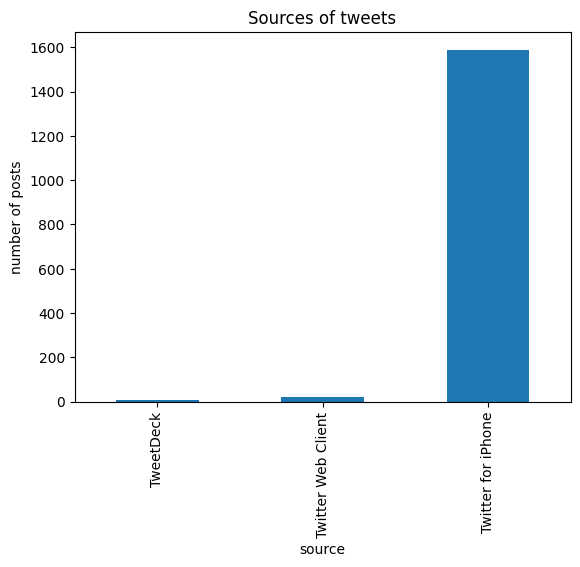

In [232]:
#plot the best 20 sources by posts
df1['source'].value_counts()[20::-1].plot(kind = 'bar', title = 'Sources of tweets')
plt.ylabel('number of posts');
plt.xlabel('source');

Iphone was the fanous source

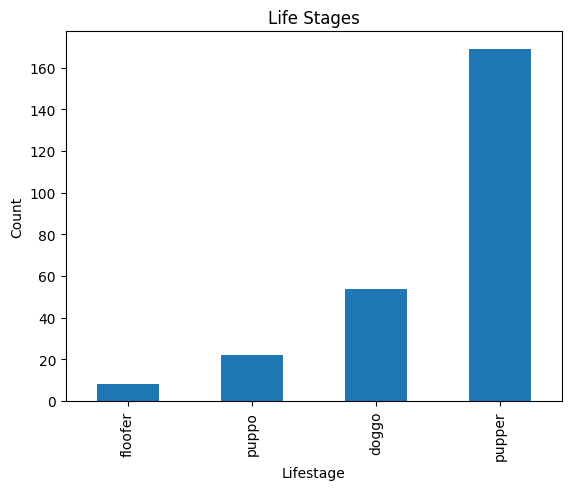

In [233]:
# Plot 20 stages per posts
df1['lifestage'].value_counts()[20::-1].plot(kind = 'bar', title = 'Life Stages')
plt.ylabel('Count')
plt.xlabel('Lifestage');

Floffer does it

<h3>References</h3>

 https://pandas.pydata.org/docs/reference/api/pandas.melt.html" </p>
https://towardsdatascience.com/twitter-analytics-weratedogs-a441be7d4a85"</p>
https://learn.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015"</p>